In [6]:
import numpy as np 
from mnist import MNIST
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize


In [7]:
from display_network import *


In [8]:
mndata = MNIST('C:/Users/Yos/Documents/GitHub/Learn_python/Python machine learning/MNIST/')
mndata.load_testing()
X = mndata.test_images
X0 = np.asarray(X)[:1000,:]/256.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)


<class 'numpy.ndarray'>
(784, 10)


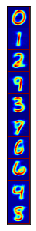

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  from ipykernel import kernelapp as app


In [9]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation ='nearest', cmap ='jet')
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())


image = cmap(norm(A))

import scipy.misc
scipy.misc.imsave('aa.png', image)

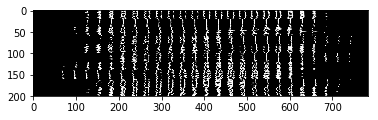

In [21]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]
    
    center_k = [kmeans.cluster_centers_[k]]
    
    neigh = NearestNeighbors(N0).fit(Xk)
    
    dist, nearest_id = neigh.kneighbors(center_k , N0)
    
    X1[N0*k:N0*k+N0, : ] = Xk[nearest_id, :]
    X2[N0*k:N0*k+N0, : ] = Xk[:N0, :]
plt.imshow(X1)

(291, 581)


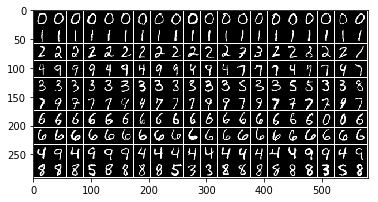

In [26]:
plt.axis()
A = display_network(X1.T, K, N0)
print(A.shape)
f2 = plt.imshow(A)
plt.gray()
plt.show()